# Data Preprocessing of House Prediction Dataset

In [8]:
#import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# load dataset
df = pd.read_csv("AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Pipe line of house prediction data set 

In [78]:

# import libraries for pipeline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# pipe line of house prediction data set
def house_prediction_pipeline(df):
    df = df.copy()

    # Log transform SalePrice 
    df['SalePrice_log'] = np.log1p(df['SalePrice'])

    # IQR on log SalePrice
    Q1 = df['SalePrice_log'].quantile(0.25)
    Q3 = df['SalePrice_log'].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    df_iqr = df[(df['SalePrice_log'] >= low) & (df['SalePrice_log'] <= high)]

    # Log transform Lot Area
    df_iqr['Lot Area_log'] = np.log(df_iqr['Lot Area'])
    # IQR on Lot Area_log
    Q1 = df_iqr['Lot Area_log'].quantile(0.25)
    Q3 = df_iqr['Lot Area_log'].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    df_iqr = df_iqr[(df_iqr['Lot Area_log'] >= low) & (df_iqr['Lot Area_log'] <= high)]

    # Label Encoding on numeric columns
    categorical_cols = [
        'Street', 'Lot Shape', 'Land Contour', 'Lot Config',
        'Land Slope', 'Neighborhood', 'House Style', 'Foundation'
    ]

    le = LabelEncoder()
    for col in categorical_cols:
        df_iqr[col] = le.fit_transform(df_iqr[col])

    # Final columns
    final_cols = categorical_cols + [
        'Year Built', 'Bedroom AbvGr', 'Kitchen AbvGr',
        'Lot Area_log', 'SalePrice_log'
    ]

    return df_iqr[final_cols], df_iqr


# Call pipeline
transformed_df, df_iqr = house_prediction_pipeline(df)


C:\Users\HP\AppData\Local\Temp\ipykernel_14996\1745727018.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr['Lot Area_log'] = np.log(df_iqr['Lot Area'])


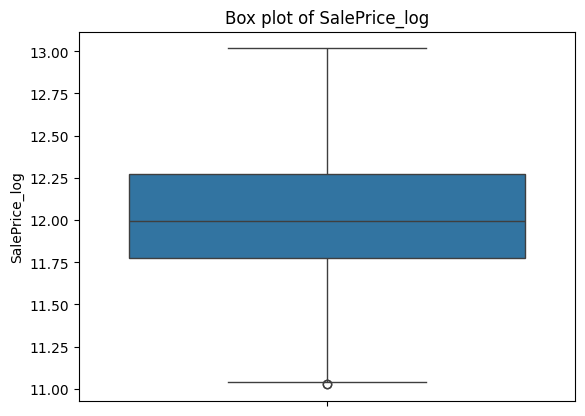

In [80]:
# box plot of Saleprice_log 
sns.boxplot(data=df_iqr['SalePrice_log'])
plt.title('Box plot of SalePrice_log')
plt.show()

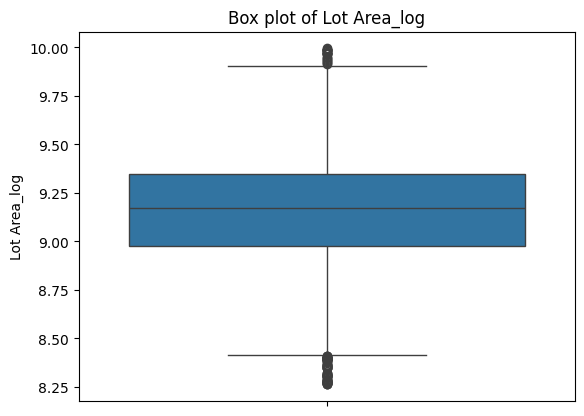

In [81]:
# box plot of Lot Area_log
sns.boxplot(data=df_iqr['Lot Area_log'])
plt.title('Box plot of Lot Area_log')
plt.show()


# House Price Prediction Model

In [ ]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Linea
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
# call the house prediction pipeline
transformed_df, df_iqr = house_prediction_pipeline(df)
# select the Label
y = transformed_df['SalePrice_log']
# select all features
X_all = transformed_df.drop('SalePrice_log', axis=1)
# best feature selection
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X_all, y)
mask = selector.get_support()
selected_features = X_all.columns[mask]
# create features variables
X = transformed_df[selected_features]
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Call the model / algorithm
model = RandomForestRegressor
# fit the model
model.fit(X_train, y_train)
# make predictions
y_pred_actual = np.expm1(y_pred)
print(y_pred_actual)
# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")





C:\Users\HP\AppData\Local\Temp\ipykernel_14996\1745727018.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr['Lot Area_log'] = np.log(df_iqr['Lot Area'])


NameError: name 'RandomForestRegressor' is not defined